# Notes

The data contains four sensors: phone(accelerameter), phone(gyro accelerameter), smartwatch(accelerameter), smartwatch(gyro accelerameter). There are over 4 sets of sub data.
The purpose is to categories if the activity falls under one of the following action.
One way to create high level features from these feature is to use distribution partitioning, by partitioning every 10s or 200 sample points and turn them into classification features.


In [13]:
from datetime import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import numpy
import pandas as pd
import seaborn as sns
import string
import os
from os import listdir
from os.path import isfile, join

In [2]:
action = str('walking, jogging, stairs, sitting, standing, typing, brushing teeth, eathing soup, eating chips, eating pasta, drinking from cup, eating sandwitch, soccer, tennis, basketball, writing, clapping, folding clothes')
l = [n.lstrip() for n in action.split(",")]
alpha = [n for n in string.ascii_uppercase[:19]]
alpha.remove('N')
dict_action = {k:v for k,v in zip(alpha,l)}

## Phone accel first

In [3]:
os.getcwd()

'C:\\Users\\kai_t\\000001 Jupyter\\wisdm\\project'

In [3]:
path_accel = 'C:\\Users\\kai_t\\000001 Jupyter\\wisdm\\wisdm-dataset\\wisdm-dataset\\raw\\phone\\accel'
onlyfiles = [f for f in listdir(path_accel) if isfile(join(path_accel, f))]

In [8]:
df = pd.DataFrame()

for accel in onlyfiles[1:]:
    dfq = pd.read_csv(path_accel + '\\' + accel, names = ['id', 'activity', 'timestamp', 'x', 'y', 'z'])
    dfq['z'] = list([np.float(n.split(';')[0]) for n in dfq['z']])
    df = pd.concat([df, dfq])

In [5]:
len(df)

4804403

In [6]:
df.head()

,id,activity,timestamp,x,y,z
0,1600,A,252207666810782,-0.364761,8.793503,1.055084
1,1600,A,252207717164786,-0.879730,9.768784,1.016998
2,1600,A,252207767518790,2.001495,11.109070,2.619156
3,1600,A,252207817872794,0.450623,12.651642,0.184555
4,1600,A,252207868226798,-2.164352,13.928436,-4.422485


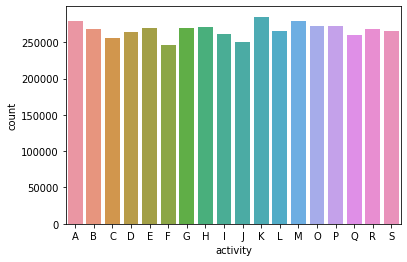

In [7]:
sns.countplot(df['activity'])

Text(0.5, 1.0, 'X distribution')

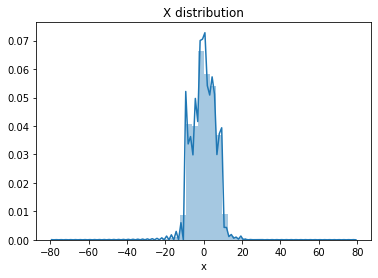

In [20]:
sns.distplot(df['x'])
plt.title('X distribution')

Text(0.5, 1.0, 'Y distribution')

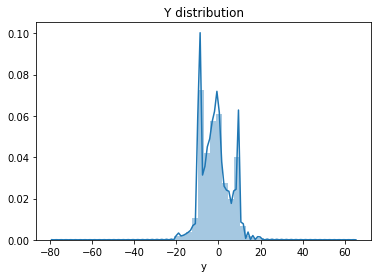

In [21]:
sns.distplot(df['y'])
plt.title('Y distribution')

Text(0.5, 1.0, 'Z distribution')

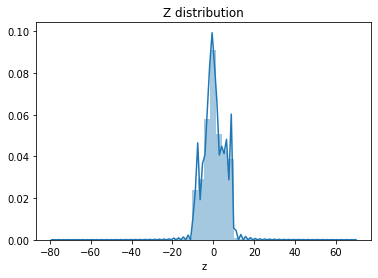

In [22]:
sns.distplot(df['z'])
plt.title('Z distribution')

In [10]:
dfs = df[df.id == 1650]

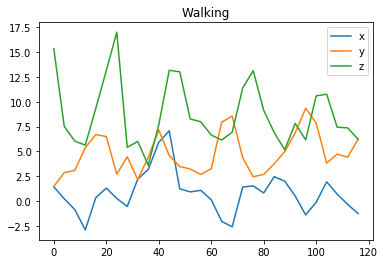

In [11]:
dfss = dfs[dfs.activity == 'A']

for n in ['x','y','z']:
    sns.lineplot(data = dfss[dfss.activity == 'A'].iloc[0:120:4][n])
plt.title('Walking')
plt.legend(('x','y','z'))

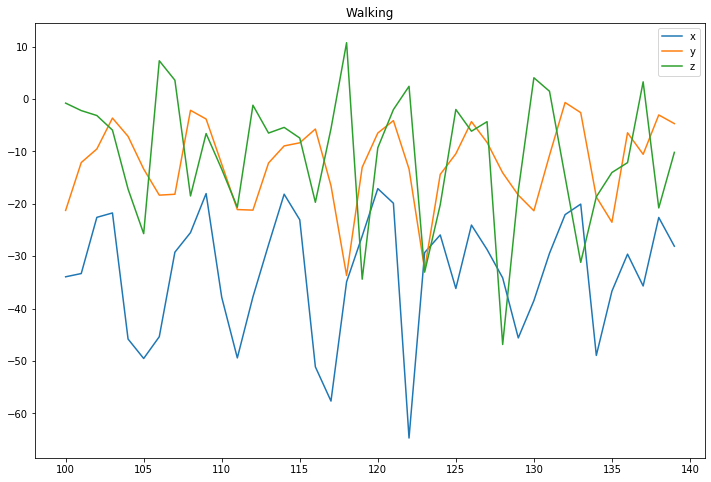

In [91]:
dfss = dfs[dfs.activity == 'A'][['x','y','z']]
l = pd.DataFrame()
nn = int(len(dfss)/4)


for n in range(nn-1):
    l = pd.concat([l, dfss.iloc[(4*n):(4*(n+1))].sum()], axis=1, sort=False)
    
ll = l.transpose().reset_index(drop=True)

plt.figure(figsize=(12,8))
for nn in ['x','y','z']:
    sns.lineplot(data = ll[100:140][nn])
    plt.title('Walking')
    plt.legend(('x','y','z'))


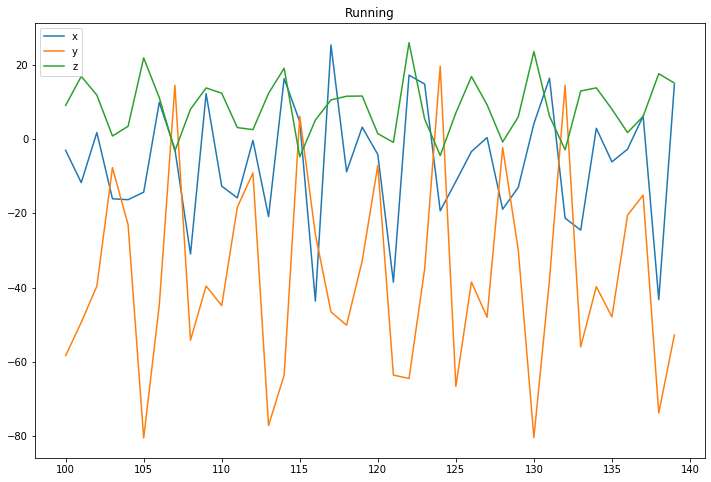

In [92]:
dfss = dfs[dfs.activity == 'B'][['x','y','z']]
l = pd.DataFrame()
nn = int(len(dfss)/4)


for n in range(nn-1):
    l = pd.concat([l, dfss.iloc[(4*n):(4*(n+1))].sum()], axis=1, sort=False)
    
ll = l.transpose().reset_index(drop=True)

plt.figure(figsize=(12,8))
for nn in ['x','y','z']:
    sns.lineplot(data = ll[100:140][nn])
    plt.title('Running')
    plt.legend(('x','y','z'))

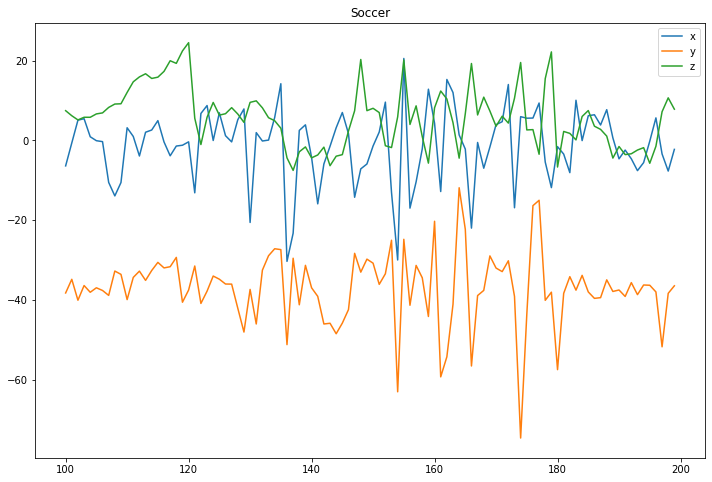

In [93]:
dfss = dfs[dfs.activity == 'M'][['x','y','z']]
l = pd.DataFrame()
nn = int(len(dfss)/4)


for n in range(nn-1):
    l = pd.concat([l, dfss.iloc[(4*n):(4*(n+1))].sum()], axis=1, sort=False)
    
ll = l.transpose().reset_index(drop=True)

plt.figure(figsize=(12,8))
for nn in ['x','y','z']:
    sns.lineplot(data = ll[100:200][nn])
    plt.title('Soccer')
    plt.legend(('x','y','z'))

In [ ]:
for n in ['x','y','z']:
    sns.lineplot(data=df[df.activity == 'B'].iloc[::20, :][n])
plt.title('Walking')
plt.legend(('x','y','z'))

In [9]:
df1 = pd.read_csv(path_accel + '\\' + onlyfiles[2], names = ['id', 'activity', 'timestamp', 'x', 'y', 'z'])
df1['z'] = list([np.float(n.split(';')[0]) for n in df1['z']])

# Feature Engineering

In [4]:
phone_gyro = 'C:\\Users\\kai_t\\000001 Jupyter\\wisdm\\wisdm-dataset\\wisdm-dataset\\raw\\phone\\gyro'
phone_accel = 'C:\\Users\\kai_t\\000001 Jupyter\\wisdm\\wisdm-dataset\\wisdm-dataset\\raw\\phone\\accel'
watch_gyro = 'C:\\Users\\kai_t\\000001 Jupyter\\wisdm\\wisdm-dataset\\wisdm-dataset\\raw\\watch\\gyro'
watch_accel = 'C:\\Users\\kai_t\\000001 Jupyter\\wisdm\\wisdm-dataset\\wisdm-dataset\\raw\\watch\\accel'

paths = [phone_accel, phone_gyro, watch_accel, watch_gyro]

file_list = [[f for f in listdir(n) if isfile(join(n, f))] for n in paths]
onlyfiles = [item for items in file_list for item in items[1:]]

In [5]:
li = ['x', 'y', 'z']
column_list = []
for n in li:
    column_list.append(f'{n}_avg'.format(n))
for n in li:
    column_list.append(f'{n}_std'.format(n))
for n in li:
    column_list.append(f'{n}_var'.format(n))
for n in li:
    column_list.append(f'{n}_min'.format(n))
for n in li:
    column_list.append(f'{n}_range'.format(n))       

In [9]:
class part_df():

    
    timing = 1000 # 200 for 10s, 1000 for 50s, each point is 50ms
    timerange = [n for n in range(1000)] # 200 for 10s, 1000 for 50s, each point is 50ms
    
    def __init__(self, df):
        self.df = df
        self.dfx = pd.DataFrame()
        self.periodx = pd.DataFrame(columns=['xpeak', 'ypeak', 'zpeak'])
    
    def avg_(self, info):
        return pd.Series((info.loc['mean'][['x', 'y', 'z']]).values, index = column_list[:3])

    def std_(self, info):
        return pd.Series((info.loc['std'][['x', 'y', 'z']]).values, index = column_list[3:6])

    def var_(self, df):
        return pd.Series([df[xyz].var() for xyz in ['x', 'y', 'z']], index = column_list[6:9])

    def min_(self, info):
        return pd.Series((info.loc['min'][['x', 'y', 'z']]).values, index = column_list[9:12])

    def rangee_(self, info):
        return pd.Series((abs(info.loc['max'][['x', 'y', 'z']] - info.loc['min'][['x', 'y', 'z']])).values, 
                         index = column_list[12:15])

    def resultant_(self, df):
        return pd.Series((((df[['x', 'y', 'z']]**2).sum(axis=1))**(1/2)).mean(),
                         index = ['resultant'])
    
    def dummies(self, df, info):
        ranges = abs(info.loc['max']-info.loc['min'])
        dums = pd.DataFrame()
    
        for xyz in ['x', 'y', 'z']:
            rang = [(((ranges[xyz]/10) * n) + info.loc['min'][xyz]) for n in range(1,10)]
            l = np.digitize(df[xyz], rang, right=False)
            dums = pd.DataFrame(pd.concat([dums, pd.get_dummies(l, prefix = xyz).sum()/len(l)], axis =0, sort=False))
        return dums.transpose()
        
    def fit_sin(self, tt, yy):
        '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
        tt = numpy.array(tt)
        yy = numpy.array(yy)
        ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
        Fyy = abs(numpy.fft.fft(yy))
        guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
        guess_amp = numpy.std(yy) * 2.**0.5
        guess_offset = numpy.mean(yy)
        guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

        def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
        try:
            popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
            A, w, p, c = popt
            f = w/(2.*numpy.pi)
            fitfunc = lambda t: A * numpy.sin(w*t + p) + c
            return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}
        except:
            return {'period':999999}
        
    def action(self):
        act_list = list(self.df.activity.unique())
        for act in act_list:
            dfn = self.df[self.df.activity == act]
            idd = self.df['id'][0]
            for lenn in range(int(len(dfn)/self.timing)):
                dfn1 = dfn.iloc[((lenn)*self.timing):((lenn+1)*self.timing)]
                info = dfn1.describe()
                dfp = pd.DataFrame(pd.concat([self.avg_(info), self.std_(info), self.min_(info), self.rangee_(info),
                                              self.var_(dfn1), self.resultant_(dfn1), 
                                              pd.Series(act, index = ['activity']), pd.Series(idd, index = ['id'])], axis = 0  
                                    ))
                dfp = pd.concat([self.dummies(dfn1, info), dfp.transpose()], axis = 1 ,sort=False)
                period = pd.Series([self.fit_sin(self.timerange, dfn1[xyz])['period'] for xyz in ['x', 'y', 'z']], index=['xpeak', 'ypeak', 'zpeak'])
                self.periodx = self.periodx.append(period, ignore_index = True)
                dfp = pd.concat([dfp, self.periodx], axis=1, sort=False)
                self.dfx= pd.concat([self.dfx, dfp], axis = 0, sort=False)
            
        return self.dfx

In [10]:
def cycling(folder):
    df1 = pd.DataFrame()
    for dirr in folder:
        file_list = [f for f in listdir(dirr) if isfile(join(dirr, f))][1:]
        for file in file_list:
            print(file)
            dfq = pd.read_csv(dirr + '\\' + file , names = ['id', 'activity', 'timestamp', 'x', 'y', 'z'])
            dfq['z'] = list([np.float(n.split(';')[0]) for n in dfq['z']])
            x = part_df(dfq)
            dfxx = x.action()
            df1 = pd.concat([df1, dfxx], axis = 0, sort = False)
        
    return df1.reset_index(drop=True)

In [14]:
x1 = cycling(paths)

data_1600_accel_phone.txt
data_1601_accel_phone.txt
data_1602_accel_phone.txt
data_1603_accel_phone.txt
data_1604_accel_phone.txt
data_1605_accel_phone.txt
data_1606_accel_phone.txt
data_1607_accel_phone.txt
data_1608_accel_phone.txt
data_1609_accel_phone.txt
data_1610_accel_phone.txt
data_1611_accel_phone.txt
data_1612_accel_phone.txt
data_1613_accel_phone.txt
data_1614_accel_phone.txt
data_1615_accel_phone.txt
data_1616_accel_phone.txt
data_1617_accel_phone.txt
data_1618_accel_phone.txt
data_1619_accel_phone.txt
data_1620_accel_phone.txt
data_1621_accel_phone.txt
data_1622_accel_phone.txt
data_1623_accel_phone.txt
data_1624_accel_phone.txt
data_1625_accel_phone.txt
data_1626_accel_phone.txt
data_1627_accel_phone.txt
data_1628_accel_phone.txt
data_1629_accel_phone.txt
data_1630_accel_phone.txt
data_1631_accel_phone.txt
data_1632_accel_phone.txt
data_1633_accel_phone.txt
data_1634_accel_phone.txt
data_1635_accel_phone.txt
data_1636_accel_phone.txt
data_1637_accel_phone.txt
data_1638_ac

In [22]:
x1.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
x_0,0.01,0.003,NaN,0.006,NaN,NaN,0.003,NaN,NaN,NaN
x_1,0.022,0.009,NaN,0.022,NaN,NaN,0.007,NaN,NaN,NaN
x_2,0.055,0.039,NaN,0.052,NaN,NaN,0.005,NaN,NaN,NaN
x_3,0.096,0.061,NaN,0.098,NaN,NaN,0.024,NaN,NaN,NaN
x_4,0.204,0.168,NaN,0.112,NaN,NaN,0.042,NaN,NaN,NaN
x_5,0.27,0.236,NaN,0.205,NaN,NaN,0.188,NaN,NaN,NaN
x_6,0.268,0.322,NaN,0.237,NaN,NaN,0.436,NaN,NaN,NaN
x_7,0.065,0.136,NaN,0.208,NaN,NaN,0.204,NaN,NaN,NaN
x_8,0.008,0.02,NaN,0.052,NaN,NaN,0.069,NaN,NaN,NaN
x_9,0.002,0.006,NaN,0.008,NaN,NaN,0.022,NaN,NaN,NaN


In [94]:
x = pd.read_csv('C:\\Users\\kai_t\\000001 Jupyter\\wisdm\\project\\phonewatchdata.csv')

In [95]:
x.head().transpose()

,0,1,2,3,4
x_0,0.005,0.03,0.03,0.04,0.02
x_1,0.01,0.025,0.015,0.055,0.025
x_2,0.05,0.06,0.045,0.06,0.075
x_3,0.085,0.065,0.095,0.09,0.095
x_4,0.14,0.125,0.26,0.135,0.18
x_5,0.19,0.215,0.245,0.17,0.215
x_6,0.25,0.23,0.245,0.2,0.255
x_7,0.18,0.18,0.06,0.165,0.12
x_8,0.07,0.055,NaN,0.065,0.01
x_9,0.02,0.015,0.005,0.02,0.005


In [97]:
x.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x_0,76630.0,0.030619,0.056424,5.000000e-03,0.010000,0.015000,0.030000,0.975000
x_1,69275.0,0.055675,0.078670,5.000000e-03,0.015000,0.030000,0.065000,0.975000
x_2,73368.0,0.093866,0.104712,5.000000e-03,0.025000,0.060000,0.120000,0.975000
x_3,75182.0,0.146135,0.130367,5.000000e-03,0.050000,0.115000,0.200000,0.970000
x_4,75887.0,0.188740,0.139934,5.000000e-03,0.085000,0.165000,0.255000,0.985000
x_5,75835.0,0.188642,0.139341,5.000000e-03,0.085000,0.165000,0.255000,0.980000
x_6,75072.0,0.144939,0.128758,5.000000e-03,0.050000,0.115000,0.195000,0.965000
x_7,73195.0,0.092068,0.103470,5.000000e-03,0.025000,0.060000,0.120000,0.965000
x_8,68890.0,0.054810,0.078799,5.000000e-03,0.015000,0.030000,0.065000,0.950000
x_9,76630.0,0.033004,0.064611,5.000000e-03,0.010000,0.015000,0.030000,0.970000


# DF Plot Info

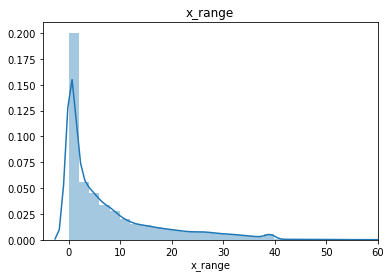

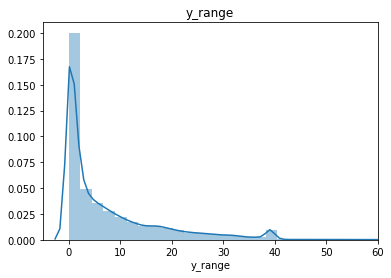

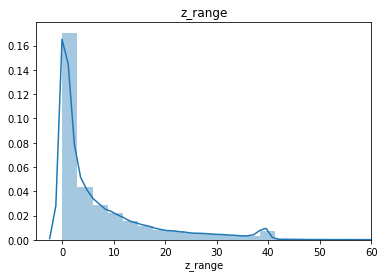

In [41]:
for n in ['x_range', 'y_range', 'z_range']:
    plt.figure()
    plt.title(n)
    sns.distplot(x[n])
    plt.xlim(-5,60)

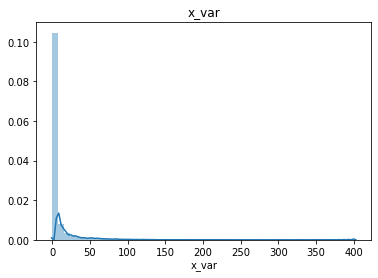

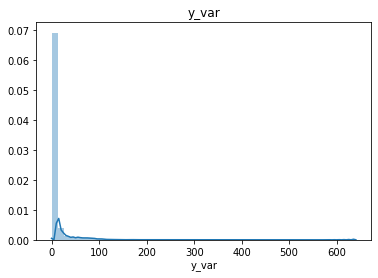

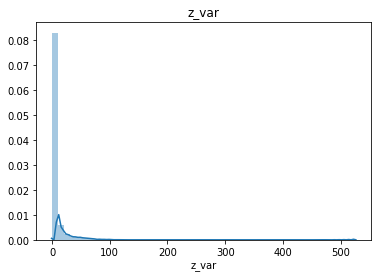

In [42]:
for n in ['x_var', 'y_var', 'z_var']:
    plt.figure()
    plt.title(n)
    sns.distplot(x[n])

Text(0.5, 1.0, 'resultant')

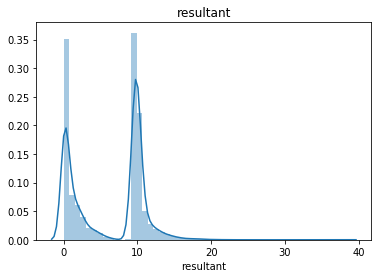

In [37]:
sns.distplot(x['resultant'])
plt.title('resultant')